In [1]:
import matplotlib
import pandas as pd
import seaborn as sns
import math
import statistics
import numpy as np
sns.set(color_codes=True)
Production = pd.read_csv('net-production.csv')
Production.info()
Production

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country or Area          461 non-null    object 
 1   Commodity - Transaction  461 non-null    object 
 2   Year                     459 non-null    float64
 3   Unit                     459 non-null    object 
 4   Quantity                 459 non-null    float64
 5   Quantity Footnotes       126 non-null    float64
dtypes: float64(3), object(3)
memory usage: 21.7+ KB


,Country or Area,Commodity - Transaction,Year,Unit,Quantity,Quantity Footnotes
0,Algeria,Electricity - net production,2018.0,"Kilowatt-hours, million",68962.0,NaN
1,Algeria,Electricity - net production,2017.0,"Kilowatt-hours, million",68545.0,NaN
2,Algeria,Electricity - net production,2016.0,"Kilowatt-hours, million",64032.0,NaN
3,Algeria,Electricity - net production,2015.0,"Kilowatt-hours, million",62212.0,NaN
4,Algeria,Electricity - net production,2014.0,"Kilowatt-hours, million",57693.0,NaN
...,...,...,...,...,...,...
456,Zimbabwe,Electricity - net production,2012.0,"Kilowatt-hours, million",9048.0,NaN
457,Zimbabwe,Electricity - net production,2011.0,"Kilowatt-hours, million",9053.0,NaN
458,Zimbabwe,Electricity - net production,2010.0,"Kilowatt-hours, million",8330.0,NaN
459,fnSeqID,Footnote,NaN,NaN,NaN,NaN


No handles with labels found to put in legend.
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Country or Area', ylabel='Quantity'>

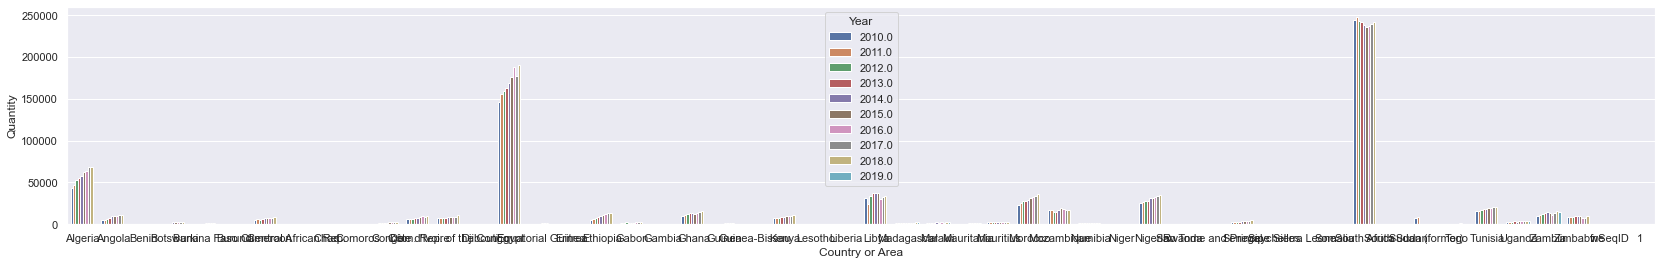

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
production = pd.read_csv('net-production.csv')
 
plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])
m = 0.2 # inch margin
s = maxsize/plt.gcf().dpi*60+2*m
margin = m/plt.gcf().get_size_inches()[0]

plt.gcf().subplots_adjust(left=margin, right=1.-margin)
plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])


 
    

plt.legend(loc='upper right')
sns.barplot(production['Country or Area'],production['Quantity'],  production['Year'])

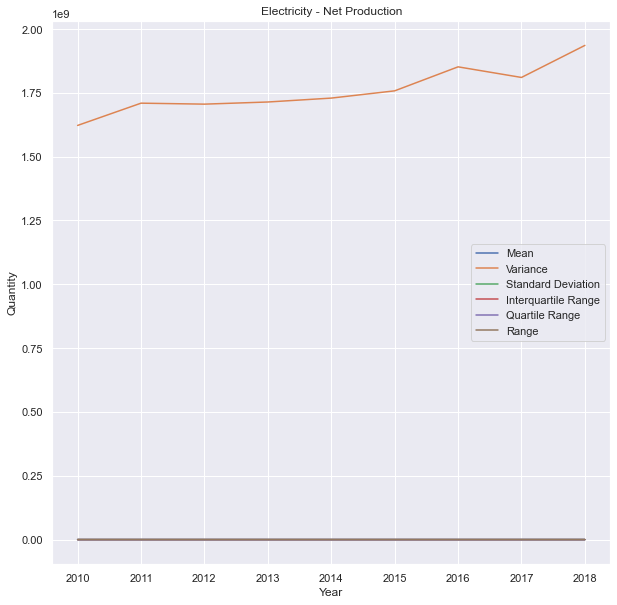

In [3]:
plt.figure(figsize=(10,10))

def interquartile_range(sample):
    q3, q1 = np.percentile(sample, [75 ,25])
    return q3 - q1

def quartile_range(sample):
    q3, q1 = np.percentile(sample, [75 ,25])
    return (q3 - q1)/2

def _range(sample):
    return sample.max() - sample.min()

def create_plot(fn, label):
    ls = []
    for year in range(2010,2019):
            ls.append(fn(production[production['Year'] == year]['Quantity']))
              
    plt.plot(range(2010,2019), ls, label=label)
    plt.title('Electricity - Net Production')
    plt.ylabel('Quantity')
    plt.xlabel('Year')
    
create_plot(statistics.mean, 'Mean')
create_plot(statistics.variance, 'Variance')
create_plot(statistics.stdev, 'Standard Deviation')
create_plot(interquartile_range, 'Interquartile Range')
create_plot(quartile_range, 'Quartile Range')
create_plot(_range, 'Range')

plt.legend(loc='best')